In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
from b3d.utils import Bunch, get_shared
from b3d.io import (
    VideoInput,
    video_input_from_mp4, 
    plot_video_summary, 
    load_video_to_numpy, 
    load_video_info
)
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [7]:
path = get_shared()/"dynamic_SfM/video_raw/pixel4a"

print(f"Listing files from diretory...")
files = os.listdir(path)
for i, f in enumerate(files):
    if f.endswith(".mp4"):
        print(f"{i} - \033[1m{f}\033[0m")
    else:
        print(f"{i} - {f}")

Listing files from diretory...
0 - intr_pixel4a.npy
1 - room_to_room_pixel4a.mp4
2 - intr_pixel4a_1080x1920.npy
3 - grab_box_2_pixel4a.mp4
4 - grab_box_1_pixel4a.mp4


In [8]:
video_fname = path/"grab_box_1_pixel4a.mp4"
intrinsics_fname = path/"intr_pixel4a_1080x1920.npy"
info = load_video_info(video_fname)
info


File: grab_box_1_pixel4a.mp4
- T: 410
- h: 1920
- w: 1080
- fps: 30

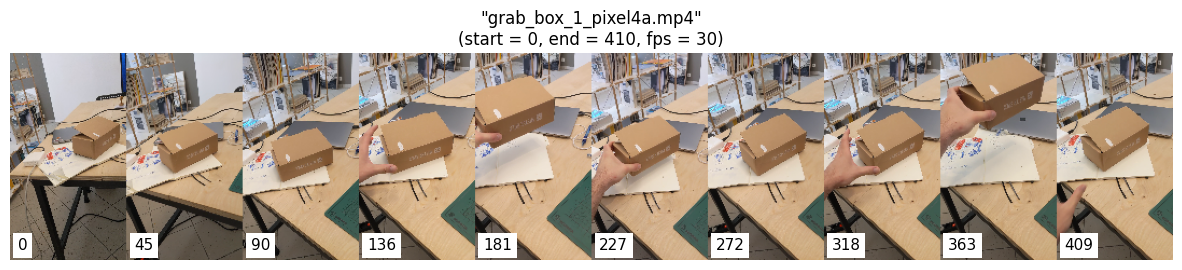

In [11]:
T = info.T
plot_video_summary(video_fname, start=0, end=T, reverse_color_channel=True)

In [12]:
# T = info.T
T = 280
times = np.arange(0, T, step=10) 
vi = video_input_from_mp4(video_fname, intrinsics_fname, times=times, downsize=1, reverse_color_channel=True)

vi_fname = path.parents[1]/"video_input"/f"{video_fname.stem}.VideoInput.npz"
vi.save(vi_fname)

print(vi_fname.name)

grab_box_1_pixel4a.VideoInput.npz


In [1]:
vi = VideoInput.load(vi_fname)
vi.fps

NameError: name 'VideoInput' is not defined

In [37]:
from b3d.io import FeatureTrackData, get_shared

data = FeatureTrackData.load(get_shared()/"dynamic_SfM/feature_track_data/grab_box_2_pixel4a.FeatureTrackData.npz")
data


FeatureTrackData:
    Timesteps: 30
    Num Keypoints: 2500
    Sensor shape (width x height): 1080 x 1920

In [38]:
data[np.linspace(0,29,10).astype(int)]


FeatureTrackData:
    Timesteps: 10
    Num Keypoints: 2500
    Sensor shape (width x height): 1080 x 1920

In [10]:
data.fps is None

True

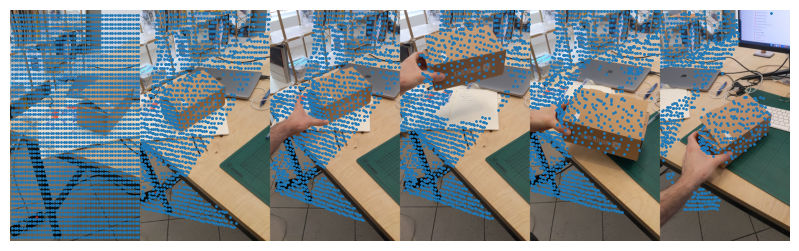

In [45]:
data[::5].quick_plot()